In [85]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.getcwd()

'C:\\Users\\18174'

In [6]:
movie_ratings=pd.read_csv("P4-Movie-Ratings.csv")

In [7]:
movie_ratings["Genre"]=movie_ratings["Genre"].astype("category")

In [8]:
movie_ratings.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [9]:
len(movie_ratings)

559

In [10]:
movie_ratings.columns=["Film", "Genre", "Rotten_Tomatoes", "Ratings", "Budget(millions)", "year"]

In [11]:
movie_ratings.describe()

,Rotten_Tomatoes,Ratings,Budget(millions),year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [12]:
movie_ratings["Budget(millions)"].mean()

50.23613595706619

In [13]:
def spending(budget):
    if budget < 20:
        return "cheap"
    elif budget < 50:
        return "average"
    else:
        return "high budget movie"

In [14]:
movie_ratings.rename({"Budget(millions)":"budget",
                    "Rotten_Tomatoes":"RT"}, axis=1, inplace=True)

<AxesSubplot:>

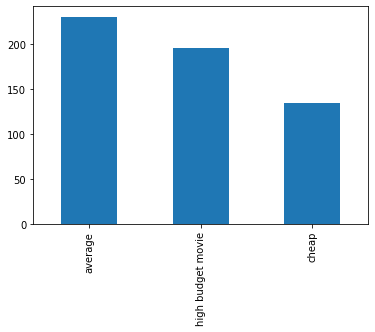

In [15]:
movie_ratings['budget'].apply(spending).value_counts().plot(kind="bar")

In [16]:
movie_ratings.isnull().any() #no null values 

Film       False
Genre      False
RT         False
Ratings    False
budget     False
year       False
dtype: bool

In [17]:
movie_ratings['Film']=movie_ratings['Film'].astype("category")

<AxesSubplot:>

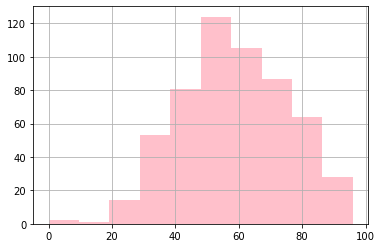

In [18]:
movie_ratings["Ratings"].hist(color='pink')

In [19]:
movie_ratings.columns

Index(['Film', 'Genre', 'RT', 'Ratings', 'budget', 'year'], dtype='object')

# Joint Plots

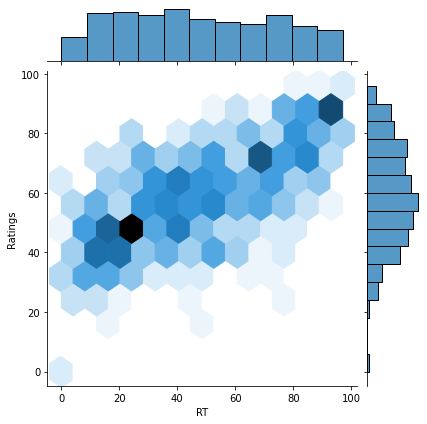

In [20]:
j=sns.jointplot(data=movie_ratings, x="RT", y="Ratings", kind="hex") #can change kind to many different parameters such as reg for regression #shows if there is relationships or dependency 

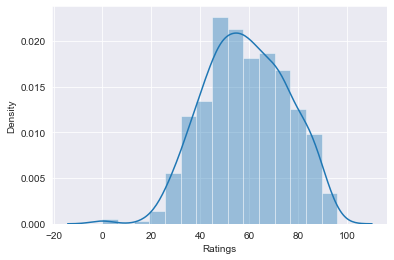

In [21]:
sns.set_style("darkgrid") #other options darkgrid,white
n1=sns.distplot(movie_ratings.Ratings, bins=15) #curve is more or less normally distributed 

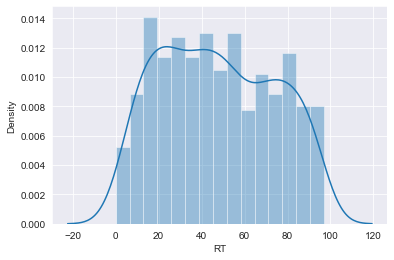

In [22]:
n2=sns.distplot(movie_ratings.RT, bins=15) #when critics use criteria to judge movies, normal distribution is lost 

# Stacked Histogram

In [23]:
movie_ratings.Genre

0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

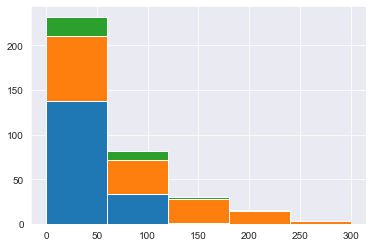

In [24]:
plt.hist( [  movie_ratings[movie_ratings['Genre']=='Comedy'].budget, \
          movie_ratings[movie_ratings['Genre']=='Action'].budget , \
         movie_ratings[movie_ratings['Genre']=='Thriller'].budget], bins=5, stacked=True)
plt.show()

In [25]:
for gen in movie_ratings['Genre'].cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


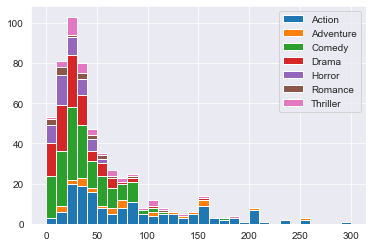

In [26]:
list1=[]
mylabels=[]
for gen in movie_ratings['Genre'].cat.categories:
    list1.append(movie_ratings[movie_ratings.Genre==gen].budget)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()